# Part 3: EDA 
In this part I will create the EDA from the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# This function create pie chart of the scale column and show us how many tornadoes in each scale we have had
def createPieChartOfScale(df):
    scaleArray = [0, 0, 0, 0, 0]
    for numberOfRow in range(len(df)):
        scaleNumber = df.iloc[numberOfRow]['Scale (EF)']
        if scaleNumber == 4 or scaleNumber == 5:
            scaleArray[4] += 1
        else:
            scaleArray[scaleNumber] += 1
    x = np.array(scaleArray)
    explode = (0.2, 0.2, 0.2, 0.2, 0.3) 
    mylabels = ["EF0", "EF1", "EF2", "EF3", "EF4/5"]
    sliceColors = ['#008cff','#db0d0d','#ebe307','#14f200', '#e600ff']
    plt.pie(x, explode=explode, labels=mylabels, colors=sliceColors, autopct='%1.1f%%', shadow=True)
    plt.legend()
    plt.title("Pie chart of Scale\n")
    plt.show()

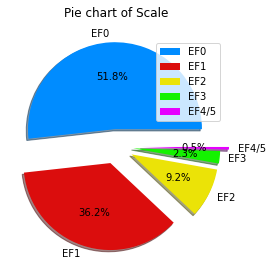

In [3]:
df = pd.read_csv("TornadoTableAfterDataCleaning.csv")
createPieChartOfScale(df)

From this pie chart we can see that tornado storms with EF0 scale is the most common and EF4/5 is the less common

In [4]:
# This function create heat map from Scale (EF), Length (KM), Width (M), Latitude, Longtitude and years columns
def createHeatMap(df):
    plt.figure(figsize=(10, 10))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
    #plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

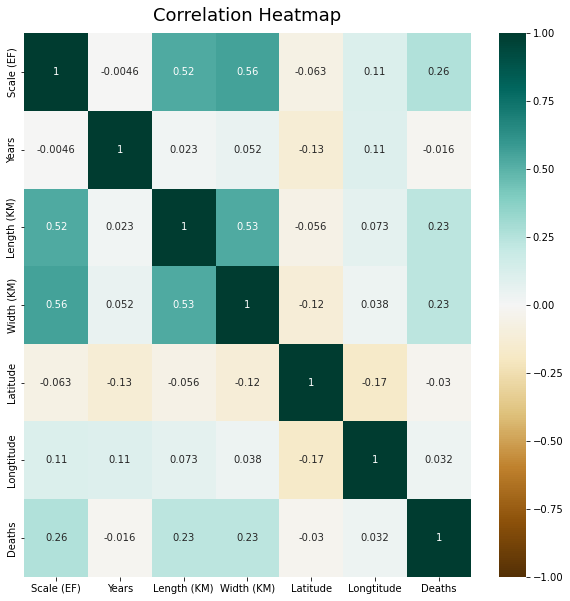

In [5]:
createHeatMap(df)

In [6]:
# This function create bar plot of Scale column by Length
def barPlotScaleByLength(df, nameOfColumn, yLim):
    new_df = df[['Scale (EF)', nameOfColumn]].copy()
    scale_df = df.groupby('Scale (EF)')[nameOfColumn].mean()
    scale_df.plot(kind='bar', figsize=(10, 5), color='#be185d')
    plt.ylim(0, yLim)
    plt.title('Bar Plot of Scale column by Length \n')
    plt.show()

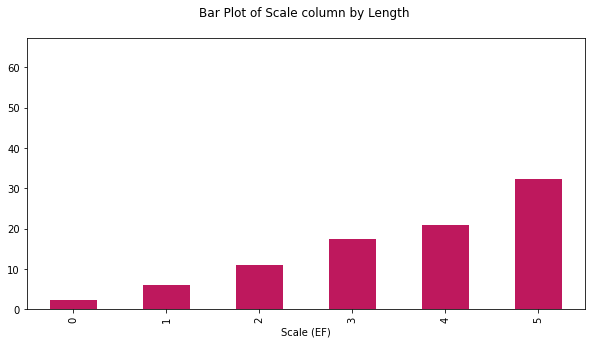

In [7]:
maxYLimOfLength = df['Length (KM)'].max()
barPlotScaleByLength(df, 'Length (KM)',maxYLimOfLength)

In [8]:
# This function create bar plot of Scale column by Width
def barPlotScaleByWidth(df, nameOfColumn, yLim):
    new_df = df[['Scale (EF)', nameOfColumn]].copy()
    scale_df = df.groupby('Scale (EF)')[nameOfColumn].mean()
    scale_df.plot(kind='bar', figsize=(10, 5), color='#0d9488')
    plt.ylim(0, yLim)
    plt.title('Bar Plot of Scale column by Width \n')
    plt.show()

From this bar plot we can see the influence of the width on scale 

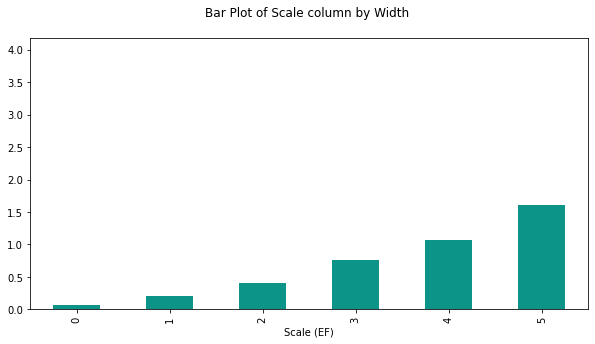

In [9]:
maxYLimOfWidth = df['Width (KM)'].max()
barPlotScaleByWidth(df, 'Width (KM)',maxYLimOfWidth)

From this bar plot we can see the influence of the length on scale 

In [10]:
# This function create bar plot of Scale and Deaths 
def deathsAndScale(df):
    new_df = df[['Scale (EF)', 'Deaths']].copy()
    scale_df = new_df.groupby(['Scale (EF)']).mean()
    scale_df.plot(kind='line', figsize=(8, 4), color='#002aff')
    maxDeaths = df['Deaths'].max()
    plt.ylim(0, maxDeaths)
    plt.title('Bar plot of Scale and Deaths \n')
    plt.show()

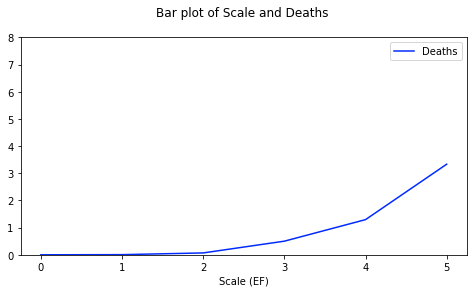

In [11]:
deathsAndScale(df)

From this bar plot we can see the influence of the scale on the number of deaths.
EF5 is the scale with the most deats.

In [12]:
# This function create bar plot that represent the amount of tornadoes per year
def tornadoesPerYear(df):
    new_df = df.Years.value_counts(ascending=True)
    new_df.plot(kind='bar', figsize=(10, 5), color='#6f00ff')
    plt.title('The amount of tornadoes per year \n')
    plt.show()

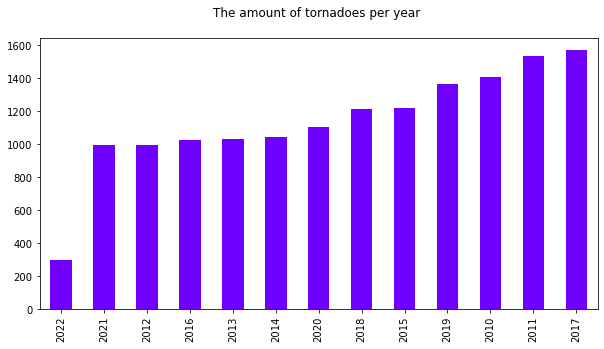

In [13]:
tornadoesPerYear(df)

From this bar plot we can see that 2017 is the year with the most tornado storms

In [14]:
# This function create bar plot that represent the amount of tornadoes per country
def tornadoesPerCountry(df):
    new_df = df.Country.value_counts(ascending=True)
    new_df.plot(kind='bar', figsize=(15, 10), color='#f87171')
    plt.title('The amount of tornadoes per country \n')
    plt.show()

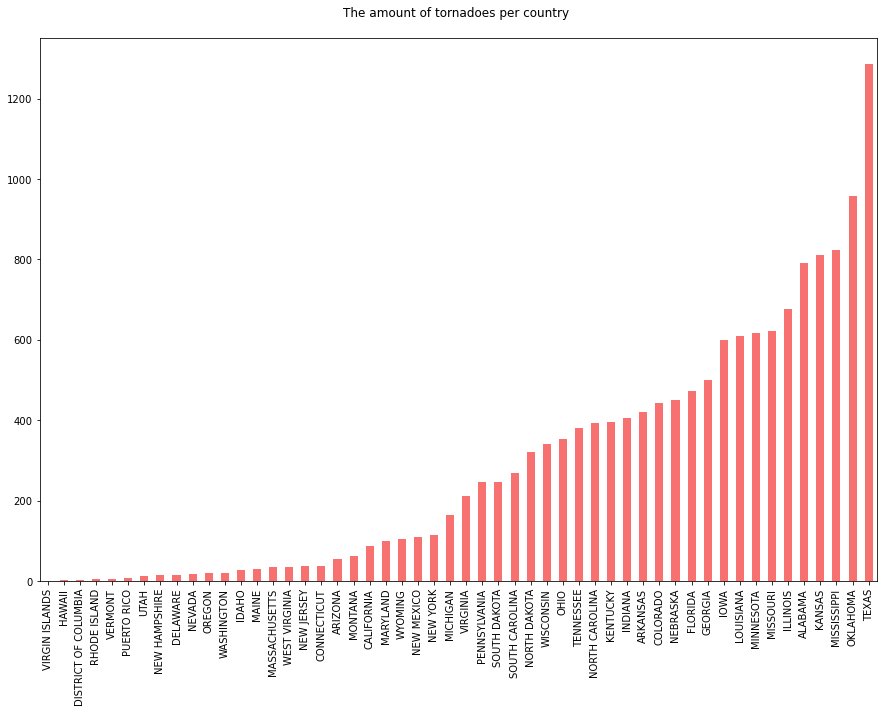

In [15]:
tornadoesPerCountry(df)

From this bar plot we can see that Texas is the country with the most tornado storms 

In [16]:
def scatterPlotOfLonAndLan(df):
    df.plot.scatter(x = 'Longtitude', y = 'Latitude')
    plt.show()

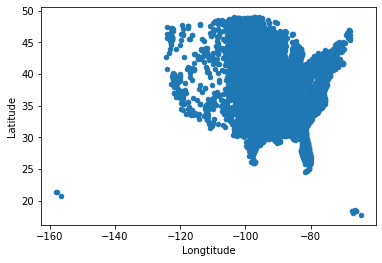

In [17]:
scatterPlotOfLonAndLan(df)

From this plot we can the distribution of tornado storms by latitude and longtitude

In [18]:
def CountryAndScale(df):
    new_df = df[['Scale (EF)', 'Country']].copy()
    new_df = new_df.groupby('Country')['Scale (EF)'].mean()
    new_df.plot(kind='bar', figsize=(20, 20), color='#002aff')
    plt.title('Bar plot of Scale and Deaths \n')
    plt.show()

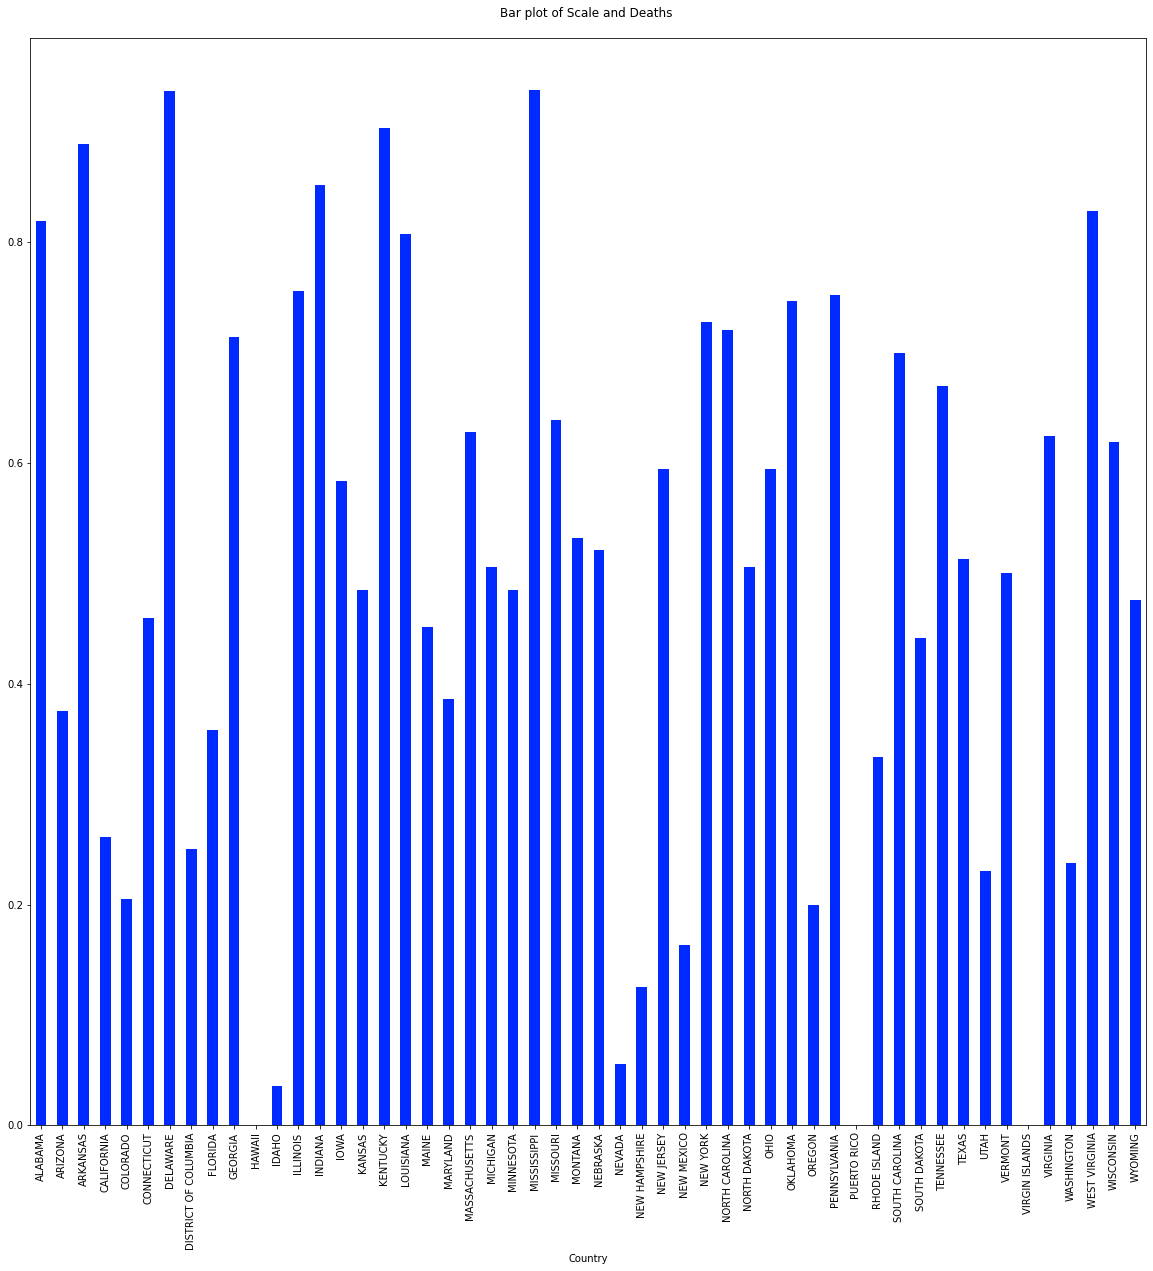

In [19]:
CountryAndScale(df)